# Text Mining - Online Job Postings

#### Business Context:
The project seeks to understand the overall demand for labour in the Armenian online job market
from the 19,000 job postings from 2004 to 2015 posted on CareerCenter, an Armenian human
resource portal. Through text mining on this data, we will be able to understand the nature of the
ever-changing job market, as well as the overall demand for labour in the Armenia economy. The
data was originally scraped from a Yahoo! Mailing group.

#### Business Objectives:
Our main business objectives are to understand the dynamics of the labour market of Armenia using
the online job portal post as a proxy. A secondary objective is to implement advanced text analytics
as a proof of concept to create additional features such as enhanced search function that can add
additional value to the users of the job portal.

####  Importing Libraries 

In [1]:
import numpy as np              
import pandas as pd                  
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#### Importing Data

In [2]:
#dataframe job postings
data=pd.read_csv('data job posts.csv')

In [3]:
data.head(10)

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,Location,JobDescription,JobRequirment,RequiredQual,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,"Yerevan, Armenia",AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\nindividu...",NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,"IREX Armenia Main Office; Yerevan, Armenia \nD...",NaN,NaN,- Bachelor's Degree; Master's is preferred;\n-...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,"Yerevan, Armenia",Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...",NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,"Manila, Philippines",The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"- Advanced degree in public health, social sci...",NaN,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,"Yerevan, Armenia",NaN,- Rendering technical assistance to Database M...,- University degree; economical background is ...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True
5,"Boutique ""Appollo""\nJOB TITLE: Saleswoman\nPO...","Jan 10, 2004",Saleswoman,"Boutique ""Appollo""",NaN,NaN,NaN,NaN,NaN,NaN,"Yerevan, Armenia\nWORK HOURS: 10:00 - 20:00; o...",Saleswoman will sell menswear and accessories.,NaN,"- Candidates should be female, 20-30 years old...",NaN,"For further information, please contact Irina\...",NaN,01 February 2004,NaN,NaN,NaN,2004,1,False
6,OSI Assistance Foundation - Armenian Branch Of...,"Jan 11, 2004",Chief Accountant/ Finance Assistant,OSI Assistance Foundation - Armenian Branch Of...,NaN,NaN,NaN,NaN,NaN,NaN,"Yerevan, Armenia",The Armenian Branch Office of the Open Society...,NaN,- University degree in finance/ accounting; \n...,NaN,"For submission of applications/ CVs, please\nc...",NaN,"16 January 2004, 6:00 pm.",NaN,NaN,NaN,2004,1,False
7,International Research & Exchanges Board (IREX...,"Jan 13, 2004",Non-paid part or full time Programmatic Intern,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,6 months,IREX Armenia Main Office\nDESCRIPTION: IREX ...,NaN,NaN,NaN,NaN,"To apply, please download and submit the\nappl...",NaN,16 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
8,Yerevan Brandy Company \nJOB TITLE: Assistant...,"Jan 13, 2004",Assistant to Managing Director,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,"Yerevan, Armenia",NaN,- Coordinating the work of subordinate employe...,- University degree;\n- At least 3 years of ex...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"27 January 2004, 18:00",NaN,NaN,NaN,2004,1,False
9,American Embassy Yerevan\nANNOUNCEMENT

In [4]:
import calendar
data['Month'] = data['Month'].apply(lambda x: calendar.month_abbr[x])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           19001 non-null  object
 1   date              19001 non-null  object
 2   Title             18973 non-null  object
 3   Company           18994 non-null  object
 4   AnnouncementCode  1208 non-null   object
 5   Term              7676 non-null   object
 6   Eligibility       4930 non-null   object
 7   Audience          640 non-null    object
 8   StartDate         9675 non-null   object
 9   Duration          10798 non-null  object
 10  Location          18969 non-null  object
 11  JobDescription    15109 non-null  object
 12  JobRequirment     16479 non-null  object
 13  RequiredQual      18517 non-null  object
 14  Salary            9622 non-null   object
 15  ApplicationP      18941 non-null  object
 16  OpeningDate       18295 non-null  object
 17  Deadline    

In [5]:
print("\n''''''''''''''''' Missing Data % '''''''''''''''''\n")
(data.isna().sum()*100/len(data)).sort_values(ascending=False)


''''''''''''''''' Missing Data % '''''''''''''''''



Audience            96.631756
AnnouncementCode    93.642440
Attach              91.795169
Notes               88.363770
Eligibility         74.053997
Term                59.602126
Salary              49.360560
StartDate           49.081627
Duration            43.171412
AboutC              34.371875
JobDescription      20.483132
JobRequirment       13.272986
OpeningDate          3.715594
RequiredQual         2.547234
Deadline             0.342087
ApplicationP         0.315773
Location             0.168412
Title                0.147361
Company              0.036840
Month                0.000000
Year                 0.000000
jobpost              0.000000
date                 0.000000
IT                   0.000000
dtype: float64

In [6]:
print(data.jobpost[0])

AMERIA Investment Consulting Company
JOB TITLE:  Chief Financial Officer
POSITION LOCATION: Yerevan, Armenia
JOB DESCRIPTION:   AMERIA Investment Consulting Company is seeking a
Chief Financial Officer. This position manages the company's fiscal and
administrative functions, provides highly responsible and technically
complex staff assistance to the Executive Director. The work performed
requires a high level of technical proficiency in financial management
and investment management, as well as management, supervisory, and
administrative skills.
JOB RESPONSIBILITIES:  
- Supervises financial management and administrative staff, including
assigning responsibilities, reviewing employees' work processes and
products, counseling employees, giving performance evaluations, and
recommending disciplinary action;
- Serves as member of management team participating in both strategic
and operational planning for the company;
- Directs and oversees the company's financial management activities,
in

In [7]:
jobpost = data.jobpost.apply(lambda x: len(x))
jobpost.describe()

count    19001.000000
mean      2650.686753
std       1281.039588
min         28.000000
25%       1847.000000
50%       2371.000000
75%       3075.000000
max      24184.000000
Name: jobpost, dtype: float64

In [8]:
data.iloc[jobpost.argmin()]

jobpost             <<< No Message Collected >>>
date                                Mar 30, 2006
Title                                        NaN
Company                                      NaN
AnnouncementCode                             NaN
Term                                         NaN
Eligibility                                  NaN
Audience                                     NaN
StartDate                                    NaN
Duration                                     NaN
Location                                     NaN
JobDescription                               NaN
JobRequirment                                NaN
RequiredQual                                 NaN
Salary                                       NaN
ApplicationP                                 NaN
OpeningDate                                  NaN
Deadline                                     NaN
Notes                                        NaN
AboutC                                       NaN
Attach              

In [9]:
data[data.jobpost.duplicated(keep=False)]

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,Location,JobDescription,JobRequirment,RequiredQual,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
37,AMERIA CJSC\nJOB TITLE: Receptionist\nPOSITIO...,"Jan 29, 2004",Receptionist,AMERIA CJSC,NaN,NaN,NaN,NaN,NaN,NaN,"Yerevan, Armenia",AMERIA Closed Joint Stock Company is seeking a...,- Handling call center receptionist duties in ...,- University degree is desirable;\n- Excellent...,NaN,"To apply for this position, please submit a\nr...",NaN,16 February 2004,NaN,NaN,NaN,2004,Jan,False
42,AMERIA CJSC\nJOB TITLE: Receptionist\nPOSITIO...,"Feb 1, 2004",Receptionist,AMERIA CJSC,NaN,NaN,NaN,NaN,NaN,NaN,"Yerevan, Armenia",AMERIA Closed Joint Stock Company is seeking a...,- Handling call center receptionist duties in ...,- University degree is desirable;\n- Excellent...,NaN,"To apply for this position, please submit a\nr...",NaN,16 February 2004,NaN,NaN,NaN,2004,Feb,False
1072,Clear Water\nTITLE: Assistant to Accountant/ ...,"Feb 24, 2005",Assistant to Accountant/ Economist,Clear Water,NaN,NaN,Everyone,NaN,March 005,NaN,"Yerevan, Armenia",NaN,- Take orders from clients;\n- Fill out invoic...,- Work experience in a relevant field;\n- Abbi...,NaN,Please send your CV to: mgawater@....\nPlease ...,25 February 2005,20 March 2005,NaN,Our company is dealing with clearing of drinki...,NaN,2005,Feb,False
1073,Clear Water\nTITLE: Assistant to Accountant/ ...,"Feb 25, 2005",Assistant to Accountant/ Economist,Clear Water,NaN,NaN,Everyone,NaN,March 005,NaN,"Yerevan, Armenia",NaN,- Take orders from clients;\n- Fill out invoic...,- Work experience in a relevant field;\n- Abbi...,NaN,Please send your CV to: mgawater@....\nPlease ...,25 February 2005,20 March 2005,NaN,Our company is dealing with clearing of drinki...,NaN,2005,Feb,False
1494,Save the Children Federation Inc. Armenia Fiel...,"Jul 6, 2005","Public Health Education, Information & Communi...",Save the Children Federation Inc. Armenia Fiel...,NaN,NaN,NaN,Public Health Professionals,September 2005,5 years,"Yerevan, Armenia",Save the Children is currently seeking experie...,- Coordinate development and dissemination of ...,"Demonstrated experience in project management,...",TBD,Please submit CV and letter of interest to Sav...,06 July 2005,11 July 2005,NaN,Save the Children is an independent organizati...,NaN,2005,Jul,False
1498,Save the Children Federation Inc. Armenia Fiel...,"Jul 6, 2005","Public Health Education, Information & Communi...",Save the Children Federation Inc. Armenia Fiel...,NaN,NaN,NaN,Public Health Professionals,September 2005,5 years,"Yerevan, Armenia",Save the Children is currently seeking experie...,- Coordinate development and dissemination of ...,"Demonstrated experience in project management,...",TBD,Please submit CV and letter of interest to Sav...,06 July 2005,11 July 2005,NaN,Save the Children is an independent organizati...,NaN,2005,Jul,False
2099,United Nations Development Program in Armenia\...,"Feb 2, 2006",Annual Work Plan Coordinator on Multisectoral ...,United Nations Development Program in Armenia,NaN,NaN,NaN,NaN,01 March 2006,3 months probation with possible extension up ...,"Yerevan, Armenia",Under the guidance and supervision of the UNDP...,- Coordinate activities of project managers an...,- Masters degree or equivalent in Business Adm...,NaN,Applications can be submitted throughhttp://oc...,02 February 2006,"15 February 2006, 5:00 p.m.",Women candidates are encouraged to apply.,NaN,NaN,2006,Feb,False
2100,United Nations Development Program in Armenia\...,"Feb 2, 2006",Annual Work Plan Coordinator on Multisectoral ...,United Nations Development Program in Armenia,NaN,NaN,NaN,NaN,01 March 2006,3 months probation with possible extension up ...,"Yerevan, Armenia",Under the guidance and supervision of the UNDP...,- Coordinate activities of project managers an...,- Masters degree or equivalent in Business Adm...,NaN,Applications can be submitted

In [10]:
data.jobpost[data.jobpost.duplicated(keep=False)].nunique()

73

In [11]:
data.jobpost.duplicated(keep=False).sum()

182

In [12]:
# Dropping duplicated data
data = data[~data.jobpost.duplicated(keep='first')]

## First glance: 
- It's evident that the information in 'jobpost' column was acquired from different sources and all the other columns, except the date, month and year were extracted from that.
- The postings were assumable posted across different online portals, resulting in a small proportion of the same data being captured multiple times 

In [13]:
# Job posts by titles
Job_title_Freq = pd.DataFrame(data.Title.value_counts().sort_values(ascending=False)*100/(~data.Title.isna()).sum())
Job_title_Freq.columns = ['Frequency%']
Job_title_Freq.head(20)

,Frequency%
Accountant,1.738669
Chief Accountant,1.160880
Medical Representative,1.139677
Sales Manager,0.869335
Administrative Assistant,0.821627
Lawyer,0.800424
Software Developer,0.705009
Project Manager,0.620196
Web Developer,0.535383
Java Developer,0.466472


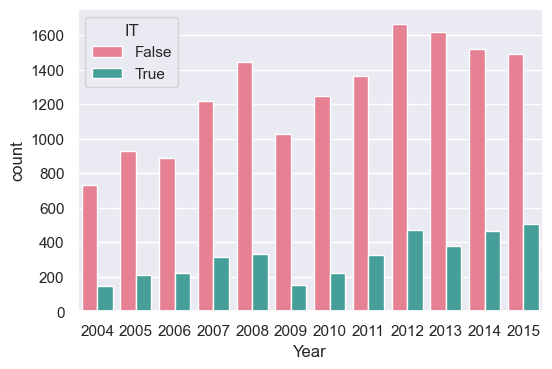

In [14]:
plt.figure(dpi=100)
sns.countplot(data=data, x="Year", hue="IT", palette='husl')
plt.show()

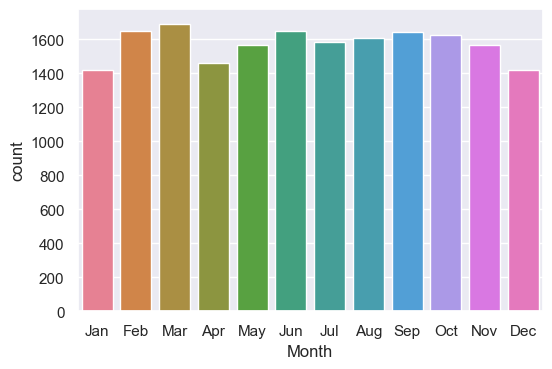

In [15]:
plt.figure(dpi=100)
sns.countplot(data=data, x="Month", palette='husl')
plt.show()

In [16]:
# Job posts by Company
Company_Freq = pd.DataFrame(data.Company.value_counts().sort_values(ascending=False)*100/(~data.Company.isna()).sum())
Company_count = pd.DataFrame(data.Company.value_counts().sort_values(ascending=False))
Company_Freq = pd.concat([Company_count, Company_Freq], axis=1)
Company_IT = pd.DataFrame(data.groupby('Company')['IT'].mean())
Company_Freq = pd.concat([Company_Freq, Company_IT], axis=1)
Company_Freq.columns = ['Count', 'Frequency%', 'IT%']
Company_Freq.head(30)

,Count,Frequency%,IT%
ArmenTel CJSC,352,1.863814,0.056818
World Vision Armenia,239,1.265488,0.000000
Mentor Graphics Development Services CJSC,235,1.244308,0.642553
Orange Armenia,201,1.064280,0.084577
Ameriabank CJSC,196,1.037806,0.112245
Career Center NGO,179,0.947792,0.005587
Converse Bank CJSC,160,0.847188,0.112500
SAS Group LLC,150,0.794239,0.113333
UNDP Armenia Office,131,0.693635,0.083969
Central Bank of Armenia,126,0.667161,0.134921


### Top job posts every Year(2004-2015)

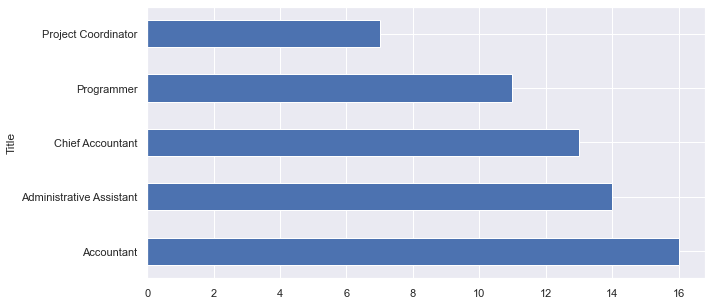

In [17]:
#2004
yr_1=data[data.Year==2004].groupby('Title').count().sort_values('jobpost',ascending=False).head(5)
plt.figure(figsize=(10, 5))
yr_1.jobpost.plot(kind='barh')
plt.show()

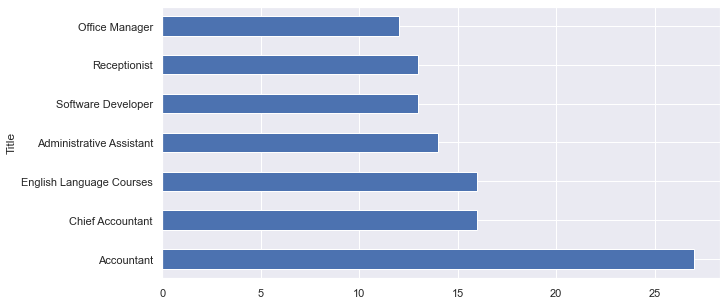

In [18]:
#2005
yr_2=data[data.Year==2005].groupby('Title').count().sort_values('jobpost',ascending=False).head(7)
plt.figure(figsize=(10, 5))
yr_2.jobpost.plot(kind='barh')
plt.show()

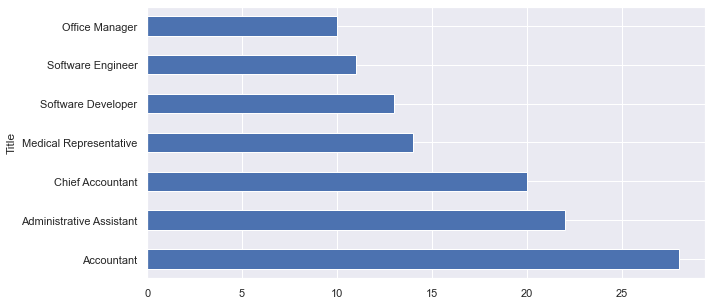

In [19]:
# 2006
yr_3=data[data.Year==2006].groupby('Title').count().sort_values('jobpost',ascending=False).head(7)
plt.figure(figsize=(10, 5))
yr_3.jobpost.plot(kind='barh')
plt.show()

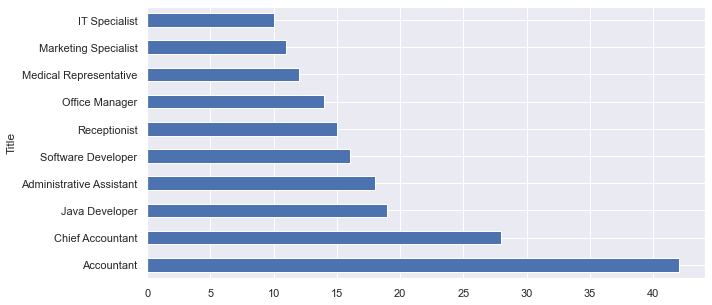

In [20]:
# 2007
yr_4=data[data.Year==2007].groupby('Title').count().sort_values('jobpost',ascending=False).head(10)
plt.figure(figsize=(10, 5))
yr_4.jobpost.plot(kind='barh')
plt.show()

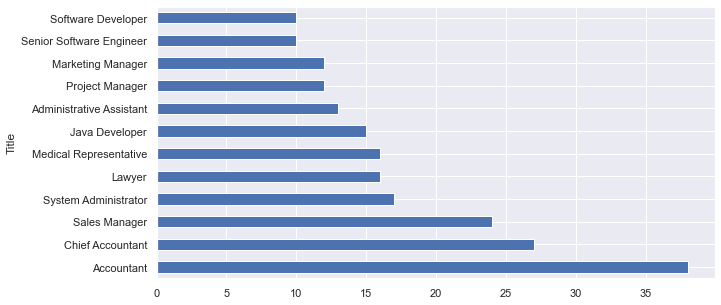

In [21]:
# 2008
yr_5=data[data.Year==2008].groupby('Title').count().sort_values('jobpost',ascending=False).head(12)
plt.figure(figsize=(10, 5))
yr_5.jobpost.plot(kind='barh')
plt.show()

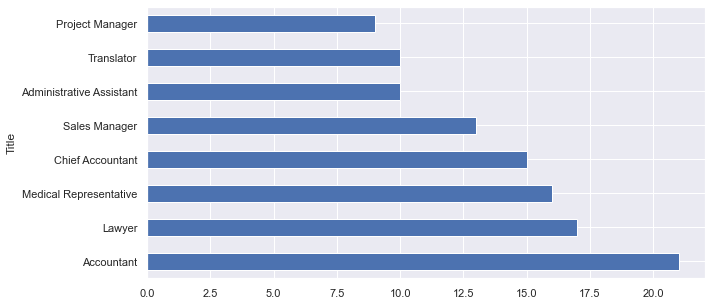

In [22]:
# 2009
yr_6=data[data.Year==2009].groupby('Title').count().sort_values('jobpost',ascending=False).head(8)
plt.figure(figsize=(10, 5))
yr_6.jobpost.plot(kind='barh')
plt.show()

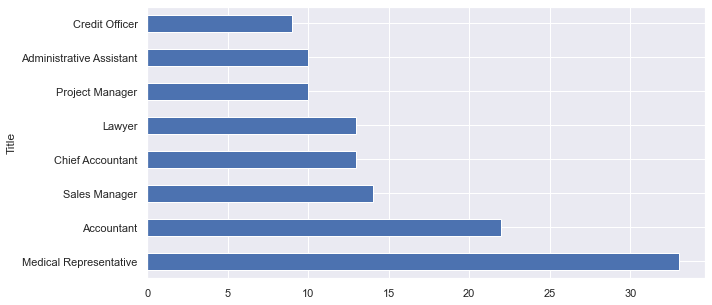

In [23]:
# 2010
yr_7=data[data.Year==2010].groupby('Title').count().sort_values('jobpost',ascending=False).head(8)
plt.figure(figsize=(10, 5))
yr_7.jobpost.plot(kind='barh')
plt.show()

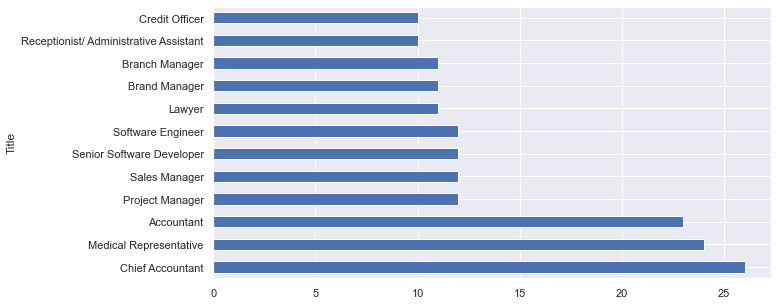

In [24]:
# 2011
yr_8=data[data.Year==2011].groupby('Title').count().sort_values('jobpost',ascending=False).head(12)
plt.figure(figsize=(10, 5))
yr_8.jobpost.plot(kind='barh')
plt.show()

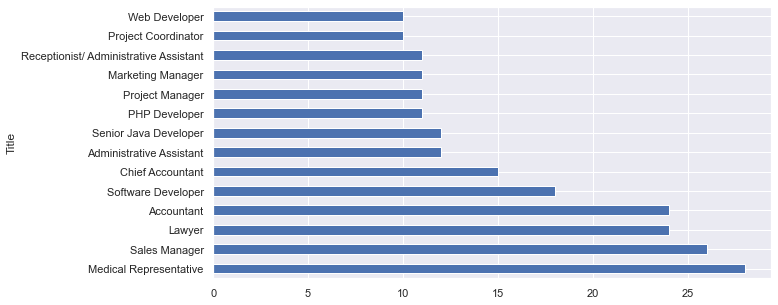

In [25]:
# 2012
yr_9=data[data.Year==2012].groupby('Title').count().sort_values('jobpost',ascending=False).head(14)
plt.figure(figsize=(10, 5))
yr_9.jobpost.plot(kind='barh')
plt.show()

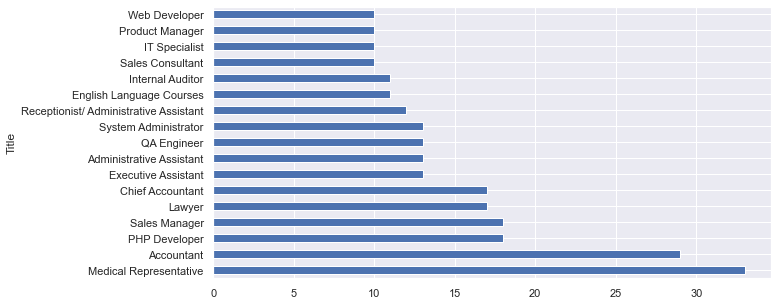

In [26]:
# 2013
yr_10=data[data.Year==2013].groupby('Title').count().sort_values('jobpost',ascending=False).head(17)
plt.figure(figsize=(10, 5))
yr_10.jobpost.plot(kind='barh')
plt.show()

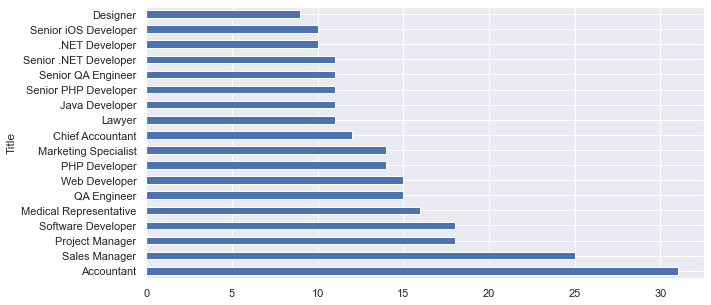

In [27]:
# 2014
yr_11=data[data.Year==2014].groupby('Title').count().sort_values('jobpost',ascending=False).head(18)
plt.figure(figsize=(10, 5))
yr_11.jobpost.plot(kind='barh')
plt.show()

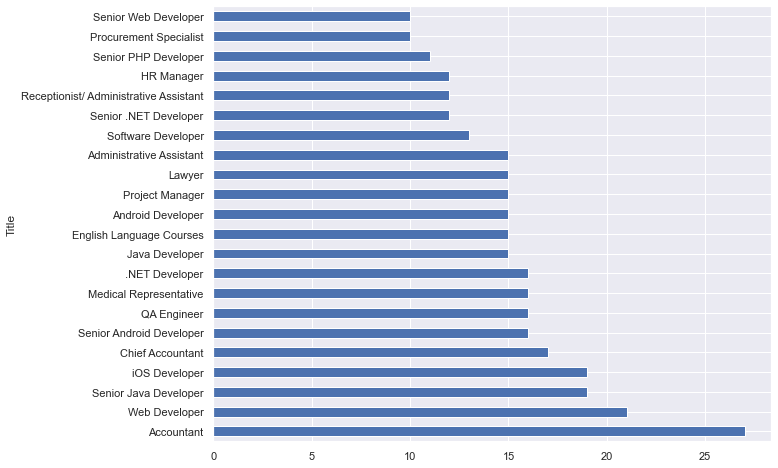

In [28]:
# 2015
yr_12=data[data.Year==2015].groupby('Title').count().sort_values('jobpost',ascending=False).head(22)
plt.figure(figsize=(10, 8))
yr_12.jobpost.plot(kind='barh')
plt.show()

### Fetching the data to operate on

In [79]:
df=data[['Title','RequiredQual','IT']]
df.dropna(inplace=True)

## Cleaning Text

In [80]:
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer, SnowballStemmer

ps = PorterStemmer()
wnl = WordNetLemmatizer()
all_stopwords = stopwords.words('english')

In [81]:
df['RequiredQual'] = df['RequiredQual'].astype(str)

# word count
df['word_count'] = df['RequiredQual'].apply(lambda x: len(str(x).split()))

# unique word count
df['unique_word_count'] = df['RequiredQual'].apply(lambda x: len(set(str(x).split())))

# number of stopwords
df["count_stopwords"] = df["RequiredQual"].apply(
    lambda x: len([w for w in str(x).lower().split() if w in all_stopwords]))


In [82]:
# convert label to a numeric variable
df['IT'] = df['IT'].astype(int)
df.head()

,Title,RequiredQual,IT,word_count,unique_word_count,count_stopwords
0,Chief Financial Officer,"To perform this job successfully, an\nindividu...",0,387,228,112
1,Full-time Community Connections Intern (paid i...,- Bachelor's Degree; Master's is preferred;\n-...,0,51,36,14
2,Country Coordinator,"- Degree in environmentally related field, or ...",0,40,35,11
3,BCC Specialist,"- Advanced degree in public health, social sci...",0,95,69,24
4,Software Developer,- University degree; economical background is ...,1,53,43,13


### Creating user defined functions for clean the text and pre-process the data

In [83]:
#convert to lowercase and remove punctuations and characters and then strip
def clean_txt(text):
    clean = re.sub('[^a-zA-Z]', ' ', text)
    clean = clean.lower()
    clean = clean.split()
    clean = [wnl.lemmatize(word, pos='v') for word in clean if not word in set(all_stopwords)]
    #clean = [ps.stem(word) for word in clean if not word in set(all_stopwords)]
    clean = ' '.join(clean)
    return clean

In [84]:
df['RequiredQual_clean'] = df['RequiredQual'].apply(lambda x: clean_txt(x))

In [45]:
# df.drop(columns=['RequiredQual'], inplace=True)
df.head()

,RequiredQual,IT,word_count,unique_word_count,count_stopwords,RequiredQual_clean
0,"To perform this job successfully, an\nindividu...",0,387,228,112,perform job successfully individual must able ...
1,- Bachelor's Degree; Master's is preferred;\n-...,0,51,36,14,bachelor degree master prefer excellent skills...
2,"- Degree in environmentally related field, or ...",0,40,35,11,degree environmentally relate field years rele...
3,"- Advanced degree in public health, social sci...",0,95,69,24,advance degree public health social science co...
4,- University degree; economical background is ...,1,53,43,13,university degree economical background plus e...


In [46]:
df.to_csv('clean_text.csv')

### Vectorization (count, tfidf) for applying LDA

In [85]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
count_vector = CountVectorizer()
tfidf_vector = TfidfVectorizer()

In [86]:
X = df['RequiredQual_clean']

count_vect = CountVectorizer(max_df=0.95,min_df=0.01)
x_count = count_vect.fit_transform(X)

tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(x_count)

In [52]:
x_count

<18458x601 sparse matrix of type '<class 'numpy.int64'>'
	with 654403 stored elements in Compressed Sparse Row format>

### View the document term matrix

In [110]:
dtm2=pd.DataFrame(X_tfidf.toarray(), columns=count_vect.get_feature_names())

In [111]:
len(df)

18437

In [112]:
len(dtm2)

18437

In [119]:
full = pd.concat([df.reset_index(), dtm2.reset_index()], axis=1).drop(columns=['index'])
len(full)

18437

In [120]:
full

,Title,RequiredQual,IT,word_count,unique_word_count,count_stopwords,RequiredQual_clean,abilities,ability,able,abroad,academic,acca,accept,access,accord,account,accountant,accuracy,accurate,achieve,acquire,act,action,active,activities,adapt,additional,administration,administrative,adobe,advance,advantage,agile,ajax,algorithms,also,analysis,analytic,analytical,analyze,apache,application,applications,apply,approach,appropriate,architecture,area,areas,armenia,armenian,asp,assessment,asset,assurance,attention,attitude,audit,autocad,automation,availability,awareness,bachelor,background,bank,base,basic,basics,behavior,best,big,bs,budget,build,business,candidate,candidates,capability,capable,capacity,car,case,cba,central,certificate,certification,change,civil,clear,clearly,client,clients,cod,code,colleagues,combination,command,commercial,commitment,communicate,communication,communications,communicative,community,company,competencies,complete,complex,comprehensive,computer,computers,concepts,conduct,confident,confidential,conflict,consider,construction,contract,control,cooperation,coordination,corel,corporate,country,create,creative,creativity,credit,critical,cross,cs,css,cultural,current,customer,customers,cycle,data,database,databases,deadlines,deal,decision,decisions,deep,degree,deliver,demonstrate,depth,design,desirable,desire,detail,develop,developer,development,different,diploma,direct,discipline,diverse,document,documentation,donor,draft,draw,drive,driver,dynamic,eager,economic,economics,economy,edit,education,educational,ee,effective,effectively,efficiency,efficient,efficiently,electrical,energetic,engineer,english,enterprise,environment,environments,equipment,equivalent,especially,essential,establish,etc,ethics,evaluation,excel,excellent,experience,expert,expertise,express,extensive,external,facilitation,familiarity,fast,field,finance,financial,five,flash,flexibility,flexible,fluency,fluent,focus,follow,foreign,formal,frame,framework,frameworks,french,full,function,functional,fund,general,german,give,goal,goals,good,government,graduate,graphic,group,hand,handle,hardware,health,high,higher,highly,hours,html,...,network,new,ngo,ngos,non,object,office,one,ood,oop,open,operate,operational,operations,optimization,oracle,oral,organization,organizational,organizations,organize,orient,orientation,os,others,outlook,pace,package,part,participation,particularly,partner,pattern,pc,people,perfect,perform,performance,perl,person,personal,personality,pharmaceutical,phd,photoshop,php,physical,physics,plan,platform,platforms,player,plus,point,policies,policy,political,position,positive,power,powerpoint,practical,practice,prefer,preferable,preferably,prepare,present,presentation,pressure,previous,principles,prior,priorities,prioritize,private,proactive,problem,problems,procedures,process,produce,product,production,products,professional,professionalism,proficiency,proficient,program,project,protocols,prove,provide,public,punctual,punctuality,python,qa,qualification,qualifications,quality,quick,quickly,ra,read,readiness,record,regions,regulations,relate,relational,relations,relationship,relationships,relevant,report,require,requirements,research,resources,respect,responsibility,responsible,result,retail,risk,role,rule,rural,russian,sales,schedule,school,science,sciences,script,sector,sectors,security,self,senior,sense,server,service,set,shell,similar,simultaneously,situations,skills,social,software,solid,solutions,solve,sound,source,speak,specific,specifications,sphere,spreadsheet,sql,staff,stakeholders,standard,standards,starter,state,statistical,statistics,stl,store,strategic,strategies,stress,stressful,strict,strong,structure,study,successful,supervision,support,system,systems,take,task,tax,tcl,tcp,team,teamwork,technical,techniques,technologies,technology,telecommunication,telecommunications,test,theory,think,thorough,three,tight,time,timely,tool,track,trade,train,translation,travel,troubleshoot,two,type,ui,uml,understand,unit,university,unix

### Topic Modeling

In [122]:
from sklearn import decomposition
from scipy.spatial.distance import pdist, squareform

In [312]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 3, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=15)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [313]:
# A function to inspect the LDA decomposition for the desired number of components

def lda_corr(n):
    lda_model = decomposition.LatentDirichletAllocation(n_components=n, learning_method='online', max_iter=20, verbose=1, random_state=1)
    X_topics = lda_model.fit_transform(X_tfidf)
    topic_word = lda_model.components_ 
    vocab = count_vect.get_feature_names()
    n_top_words = 30
    topic_summaries = []
    comps = ['Component_'+str(i+1) for i in range(n)]
    comp_corr = pd.DataFrame(X_topics, columns=comps)
    
    print('\n-----------------------\n')
    print("{} Components". format(n))
    print('\n-----------------------\n')
    
    print("\n--------------- CORRELATIONS ---------------\n")
    plt.figure(figsize=(n,n), dpi=150)
    sns.heatmap(comp_corr.corr(), annot=True, fmt=".2f")
    plt.show()
    
    print("\n--------------- DISTANCE BETWEEN CLUSTER CENTRES ---------------\n")
    distances = pdist(topic_word, metric='euclidean')
    dist_matrix = squareform(distances)
    dist_df = pd.DataFrame(dist_matrix.astype('int'), index=comps, columns=comps)
    plt.figure(figsize=(n,n), dpi=150)
    sns.heatmap(dist_df, annot=True, fmt="d")
    plt.show()
    
    for i, topic_dist in enumerate(topic_word):
        topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
        topic_summaries.append(' '.join(topic_words))
        print('\nComponent '+str(i+1))
        print('--------------------')
        print(topic_summaries[i])
        
    plot_top_words(lda_model, vocab, 30, "Topics in LDA model")
        
    


iteration: 1 of max_iter: 20
iteration: 2 of max_iter: 20
iteration: 3 of max_iter: 20
iteration: 4 of max_iter: 20
iteration: 5 of max_iter: 20
iteration: 6 of max_iter: 20
iteration: 7 of max_iter: 20
iteration: 8 of max_iter: 20
iteration: 9 of max_iter: 20
iteration: 10 of max_iter: 20
iteration: 11 of max_iter: 20
iteration: 12 of max_iter: 20
iteration: 13 of max_iter: 20
iteration: 14 of max_iter: 20
iteration: 15 of max_iter: 20
iteration: 16 of max_iter: 20
iteration: 17 of max_iter: 20
iteration: 18 of max_iter: 20
iteration: 19 of max_iter: 20
iteration: 20 of max_iter: 20

-----------------------

6 Components

-----------------------


--------------- CORRELATIONS ---------------



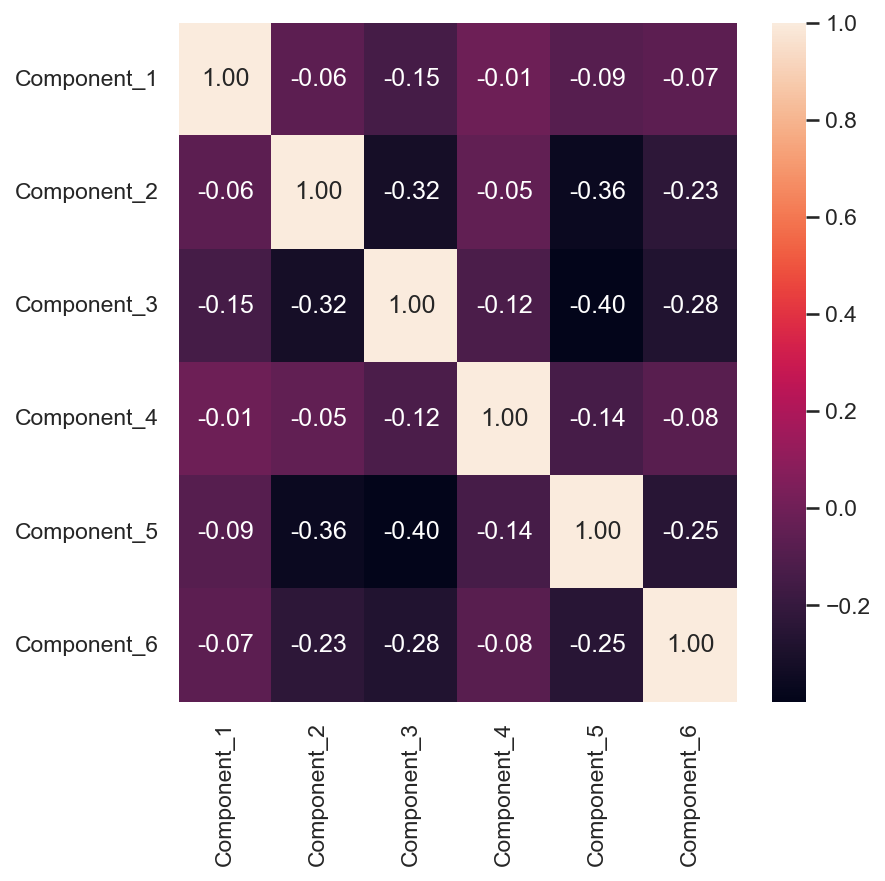


--------------- DISTANCE BETWEEN CLUSTER CENTRES ---------------



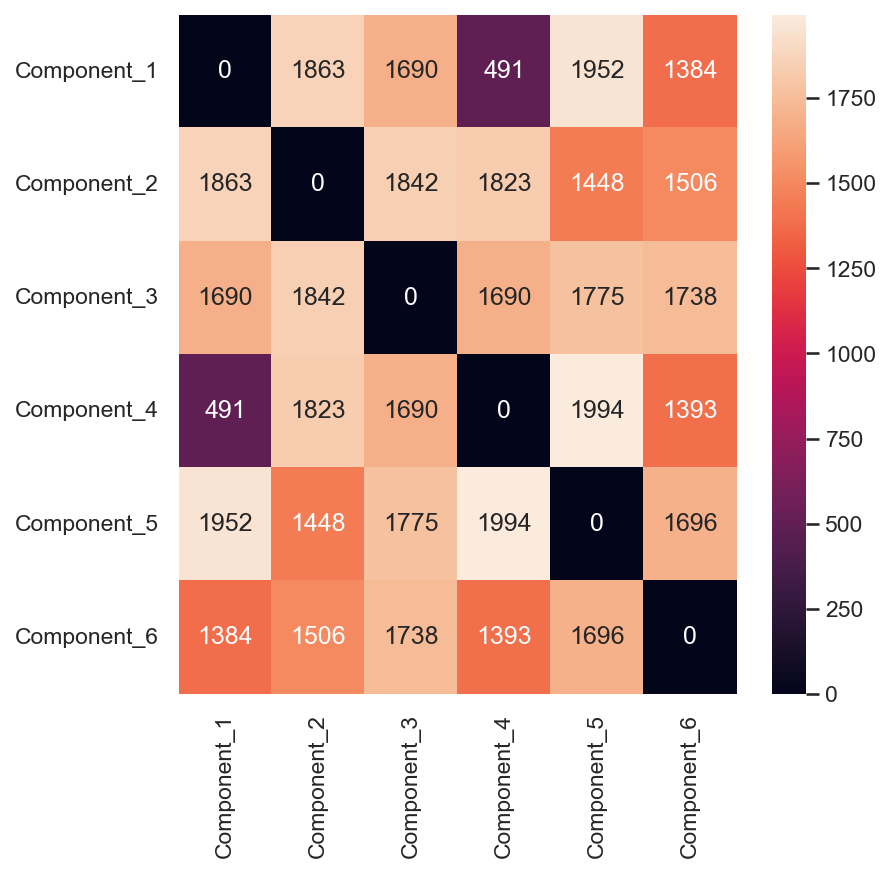


Component 1
--------------------
strict experience degree readiness frame relevant field social travel language train years english master work public fluency minimum international expertise abroad armenia journalism university relate prefer armenian science conduct political

Component 2
--------------------
skills knowledge excellent work russian languages armenian ability good english communication higher education personality experience computer office ms plus field sense language responsibility high strong university team pressure internet excel

Component 3
--------------------
knowledge experience development design good sql web net work ability test skills software plus language program years server technologies html technical linux java strong understand least javascript systems css network

Component 4
--------------------
drive license construction education availability work higher knowledge engineer experience power valid car driver point autocad quality field intermediat

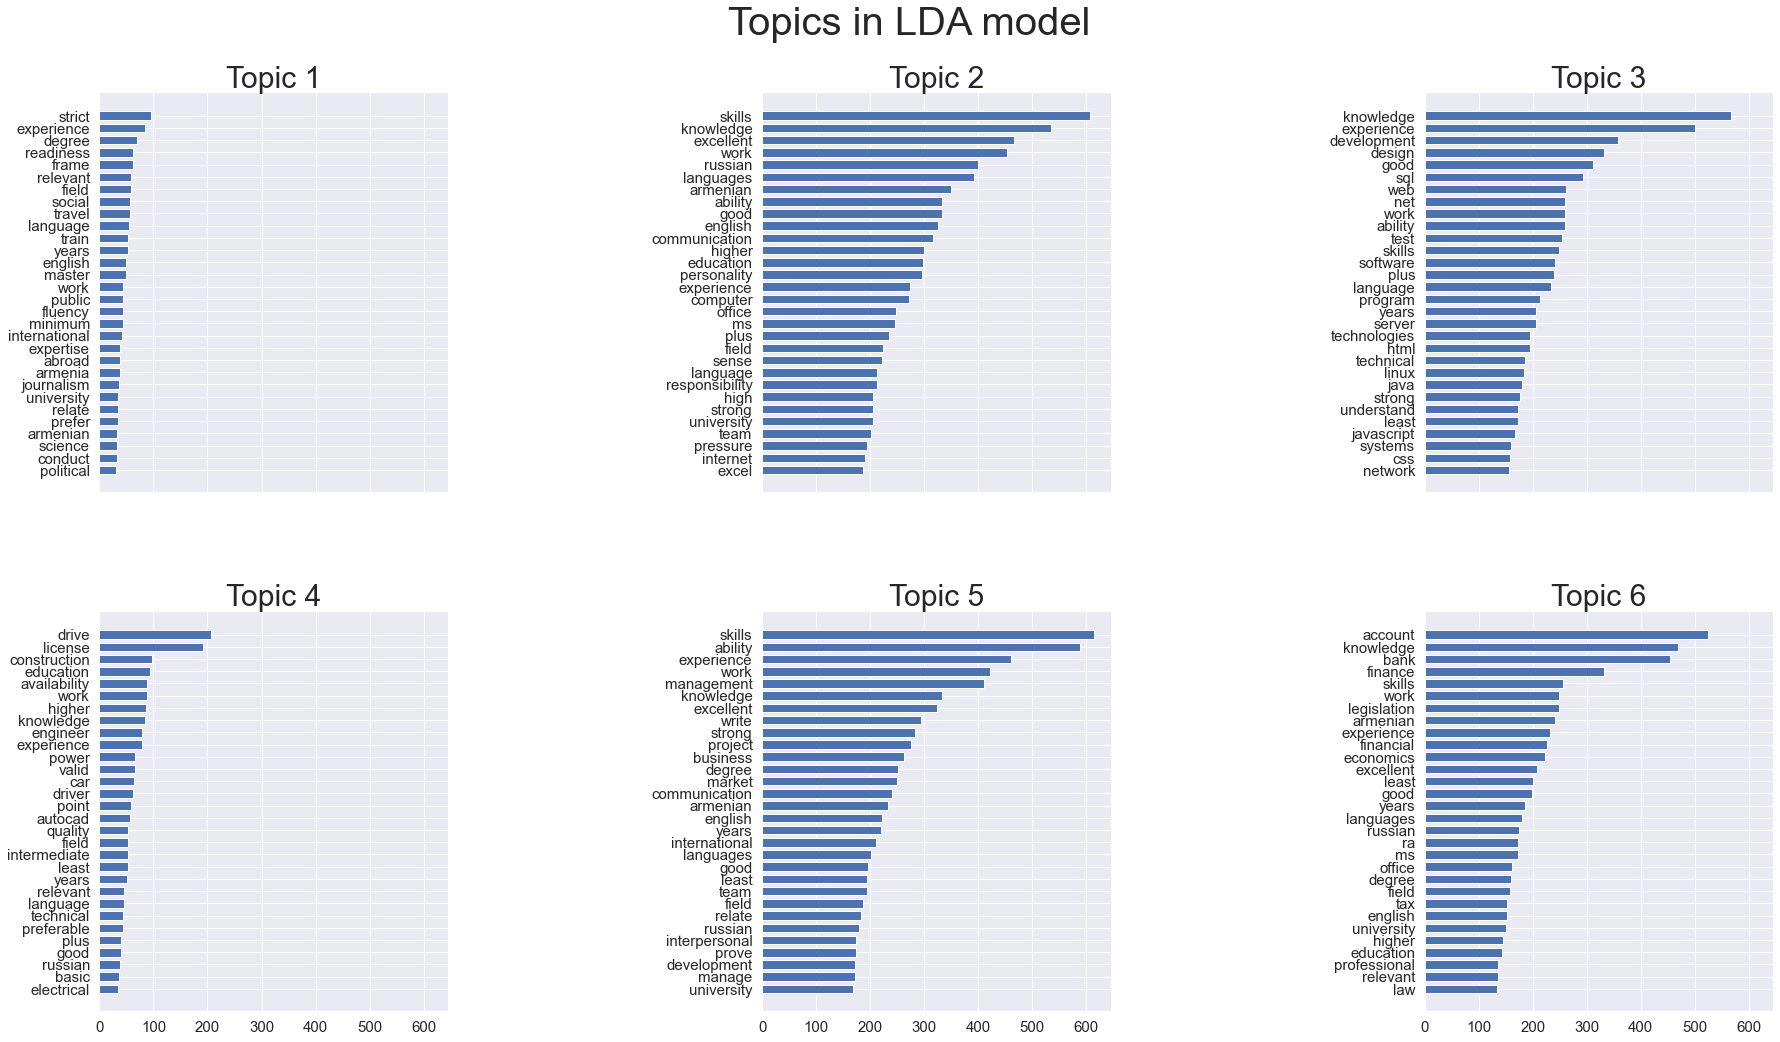

In [314]:
lda_corr(6)

#### After trying out a bunch of values, 6 seems to be a satisfactry number of components
##### A brief summary of the observations:
            1.Journalism and field documenting
            2.Sales & management 
            3.Web design and development
            4.Civil and infrastructure
            5.Buisness executive
            6.Banking, Finance and accounting

## Binary classification

In [159]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, KFold, cross_validate
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

from sklearn.tree import ExtraTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier

from scipy import sparse

In [153]:
# train features and labels 

X = df[['RequiredQual_clean', 'word_count', 'unique_word_count', 'count_stopwords']]
y = df['IT']

# split the new DataFrame into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size = 0.3,random_state = 42)

count_vector = CountVectorizer()
tfidf_vector = TfidfVectorizer()

count_cols = ['word_count', 'unique_word_count', 'count_stopwords']

In [154]:
# Train
train_x_count = count_vector.fit_transform(train_x['RequiredQual_clean'])
X_train_sparse = sparse.csr_matrix(train_x[count_cols].values)
train_x = sparse.hstack([X_train_sparse, train_x_count])

# Test
test_x_count = count_vector.transform(test_x['RequiredQual_clean'])
X_test_sparse = sparse.csr_matrix(test_x[count_cols].values)
test_x = sparse.hstack([X_test_sparse, test_x_count])

### Create user defined function for train the models

In [162]:
# Different models
models = []
models.append(('LR', LogisticRegression()))
models.append(('RFC', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('ADABC', AdaBoostClassifier()))
models.append(('ETC', ExtraTreeClassifier()))
models.append(('XGBC', XGBClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('SVCL', svm.SVC(kernel='linear')))

In [163]:
# evaluate each model in turn
Model = []
roc_auc=[]
accuracy=[]
balanced_accuracy=[]

for name, model in models:
    kfold = KFold(n_splits=5, random_state=42, shuffle=True)
    scores=['roc_auc', 'accuracy', 'balanced_accuracy']
    cv_results = cross_validate(model, train_x, train_y, cv=kfold, n_jobs=-1, scoring=scores, verbose=1)
    Model.append(name)
    roc_auc.append(cv_results['test_roc_auc'].mean())
    accuracy.append(cv_results['test_accuracy'].mean())
    balanced_accuracy.append(cv_results['test_balanced_accuracy'].mean())
    
results=pd.DataFrame({'roc_auc':roc_auc, 'accuracy':accuracy, 'balanced_accuracy':balanced_accuracy}, index=Model)
results
    

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.5s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   19.2s remaining:   28.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   20.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   24.3s remaining:   36.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   24.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.4s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

,roc_auc,accuracy,balanced_accuracy
LR,0.943759,0.918714,0.850568
RFC,0.965491,0.935141,0.875743
KNN,0.874207,0.884308,0.764567
CART,0.865878,0.914607,0.864635
ADABC,0.930685,0.905153,0.818251
ETC,0.844259,0.897017,0.843344
XGBC,0.957925,0.932119,0.875388
GBC,0.944176,0.918481,0.838098
SVCL,0.933552,0.919334,0.869185


## Random Forrest Classifier gets the cake 🍰, refining the model further

In [170]:
param = {'n_estimators': [100],
         'max_depth': [50,100,150],
         'min_samples_split':[3,4,5]
        }
gscv_rf = GridSearchCV(estimator = RandomForestClassifier(random_state=42), 
                     param_grid=param,
                     scoring = 'roc_auc',
                     cv = 5,
                     n_jobs = -1,
                     verbose=5).fit(train_x, train_y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [171]:
gscv_rf.best_estimator_

RandomForestClassifier(max_depth=100, min_samples_split=5, random_state=42)

In [172]:
gscv_rf.best_score_

0.9655914805984447

In [173]:
rf = gscv_rf.best_estimator_
rf.fit(train_x, train_y)

# Making prediction on train and test data
rf_train_pred = rf.predict(train_x)
rf_test_pred = rf.predict(test_x)

In [174]:
print("Train Dataset")
print("Accuracy : ", metrics.accuracy_score(train_y, rf_train_pred))
print("AUC      : ", metrics.roc_auc_score(train_y, rf_train_pred))
print("Log Loss : ", metrics.log_loss(train_y, rf.predict_proba(train_x)))

print("Test Dataset")
print("Accuracy : ", metrics.accuracy_score(test_y, rf_test_pred))
print("AUC      : ", metrics.roc_auc_score(test_y, rf_test_pred))
print("Log Loss : ", metrics.log_loss(test_y, rf.predict_proba(test_x)))

Train Dataset
Accuracy :  0.9917086400619914
AUC      :  0.981783367180071
Log Loss :  0.0681490293079029
Test Dataset
Accuracy :  0.9423355025307303
AUC      :  0.8855257680860228
Log Loss :  0.17179576093057602


In [175]:
# Getting classification metrics scores
print(metrics.classification_report(test_y, rf_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      4398
           1       0.92      0.79      0.85      1134

    accuracy                           0.94      5532
   macro avg       0.93      0.89      0.91      5532
weighted avg       0.94      0.94      0.94      5532



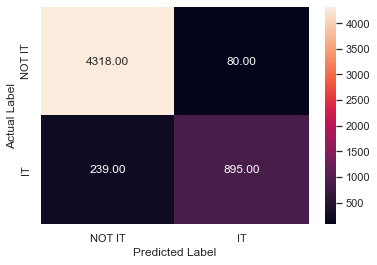

In [176]:
confusion_matrix = metrics.confusion_matrix(test_y, rf_test_pred, labels = [0,1])
sns.heatmap(confusion_matrix, annot = True, fmt = '.2f', 
            xticklabels = ['NOT IT','IT'], 
            yticklabels = ['NOT IT','IT'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

# Unsupervised Learning

In [260]:
vectorizer = TfidfVectorizer(min_df = 0.05, max_df=0.95, 
                             ngram_range=(1, 1), 
                             stop_words='english')

X_train = vectorizer.fit_transform(df['RequiredQual_clean'])
vocab = vectorizer.get_feature_names()
print('Lenght of Vocabulary: {}'.format(len(vocab)))

Lenght of Vocabulary: 160


In [261]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score,pairwise_distances

In [274]:
svd = TruncatedSVD(125)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X_lsa = lsa.fit_transform(X_train)


In [275]:
explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))

Explained variance of the SVD step: 92%


In [276]:
# Calculating Silhouette Score for K = 5 to 20
k_range = range(5,21)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_lsa)
    scores.append(metrics.silhouette_score(X_lsa, km.labels_))

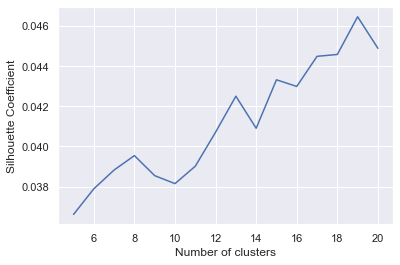

In [277]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

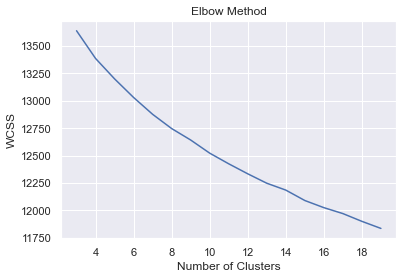

In [291]:
# Pseudo F-Score(Elbow Method)
wcss = []
for i in range(3,20):
    km = KMeans(n_clusters = i, random_state = 1)
    km.fit(X_lsa)
    wcss.append(km.inertia_)
plt.plot(range(3,20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [278]:
model = KMeans(n_clusters=8, 
               init='k-means++', 
               max_iter=100, n_init=1,random_state=5)

In [279]:
res = model.fit(X_train)
res

KMeans(max_iter=100, n_init=1, random_state=5)

In [280]:
vocab = vectorizer.get_feature_names()
vocab = np.array(vocab) 

In [281]:
cluster_centers = np.array(res.cluster_centers_)

In [282]:
res.cluster_centers_[0].argsort()

array([ 63,  53, 152,  73,  62, 131, 122,  85,  25, 127, 105,  21,  87,
        83,  15, 154, 135,  69, 150, 145,  88,  93, 146, 142,  30, 125,
        76, 114,  34, 139,  27,  31, 123,  52,  80, 119,  12, 113, 147,
        28,  38,  42,  35,  22,  24,  48, 121,  46,  94, 151,  71,  95,
        20,  57, 138,  79, 103, 153,  10, 108,   2,  68, 144,  29, 129,
        61,  56,  37, 148,  59, 112,  14,  55, 134,   7, 111,  19, 100,
        90,  82, 133,  11, 106,  54, 107, 117,  96,  92,  99,  72, 155,
        78, 141,  60, 136,   4,  50,   3,  39,  58, 101, 126,  26, 128,
       118,  74, 143, 157, 110, 132, 104,  81,  75, 115,  97,  91,  16,
       124,   8, 102,  86,  67,   5,  47,  65,   6,  98,  18, 116,  77,
       140,  17, 109, 158,  36, 137,  23,  84, 149,  43,  33,  51,  89,
        66,   1, 120, 159,   0,  40,  49,   9,  70,  41,  44,  45,  32,
       156, 130,  64,  13], dtype=int64)

In [283]:
sorted_vals = [res.cluster_centers_[i].argsort() for i in range(0,np.shape(res.cluster_centers_)[0])]

In [284]:
words=set()
for i in range(len(res.cluster_centers_)):
    words = words.union(set(vocab[sorted_vals[i][-10:]]))
    print(words)
    print('\n')

{'armenian', 'bank', 'financial', 'finance', 'legislation', 'knowledge', 'skills', 'experience', 'economics', 'work'}


{'financial', 'finance', 'skills', 'experience', 'work', 'excellent', 'armenian', 'bank', 'knowledge', 'legislation', 'account', 'economics', 'standards'}


{'market', 'business', 'financial', 'finance', 'skills', 'ability', 'experience', 'languages', 'work', 'excellent', 'armenian', 'sales', 'bank', 'knowledge', 'legislation', 'account', 'economics', 'standards'}


{'market', 'development', 'business', 'financial', 'finance', 'skills', 'ability', 'experience', 'design', 'languages', 'work', 'excellent', 'software', 'armenian', 'sales', 'bank', 'knowledge', 'legislation', 'account', 'economics', 'standards', 'good', 'web'}


{'higher', 'market', 'development', 'business', 'education', 'financial', 'finance', 'skills', 'ability', 'experience', 'design', 'languages', 'work', 'excellent', 'software', 'armenian', 'russian', 'sales', 'bank', 'knowledge', 'legislation', 'ac

In [285]:
words = list(words)

In [286]:
train_set = X_train[:,[np.argwhere(vocab==i)[0][0] for i in words]]

In [289]:
df['cluster'] = model.labels_
df.groupby('cluster').RequiredQual_clean.count()

cluster
0    1270
1    1296
2    1099
3    2876
4    2295
5    3823
6    2674
7    3104
Name: RequiredQual_clean, dtype: int64

In [290]:
df.head()

,Title,RequiredQual,IT,word_count,unique_word_count,count_stopwords,RequiredQual_clean,cluster
0,Chief Financial Officer,"To perform this job successfully, an\nindividu...",0,387,228,112,perform job successfully individual must able ...,1
1,Full-time Community Connections Intern (paid i...,- Bachelor's Degree; Master's is preferred;\n-...,0,51,36,14,bachelor degree master prefer excellent skills...,5
2,Country Coordinator,"- Degree in environmentally related field, or ...",0,40,35,11,degree environmentally relate field years rele...,7
3,BCC Specialist,"- Advanced degree in public health, social sci...",0,95,69,24,advance degree public health social science co...,7
4,Software Developer,- University degree; economical background is ...,1,53,43,13,university degree economical background plus e...,6



---


## Job Similarity
###### We will be using the trivial Euclidean distance to estimate the degree of similarity between two jobs

In [294]:
cols = ['jobpost', 'Title', 'Company', 'Term', 'Duration', 'Location', 'JobDescription', 'JobRequirment', 
        'RequiredQual', 'Salary', 'ApplicationP', 'Notes', 'AboutC', 'IT']

In [295]:
data['IT'] = data['IT'].astype('int')
df_1 = pd.concat([df[['RequiredQual_clean']], data[cols]], axis=1, join="inner")

In [298]:
vectoriser = TfidfVectorizer(max_df=.95, min_df=0.01)
job_qual = vectoriser.fit_transform(df_1['RequiredQual_clean'])
tfidf_df = pd.DataFrame(job_qual.toarray(), columns=vectoriser.get_feature_names_out(), index=df_1.index)
df_1 = pd.concat([df_1, tfidf_df], axis=1, join="inner")

In [301]:
# To calculate the euclidean didtance between two vectors
def euclid_dist(t1, t2):
    return np.sqrt(((t1-t2)**2).sum(axis=1))

In [302]:
def find_similar_jobs(title, top_n = 5):
    # To find the centre of all vectors representing the given job title
    cols = ['jobpost', 'Title', 'Company', 'Term', 'Duration', 'Location', 'JobDescription', 'JobRequirment', 
            'RequiredQual', 'Salary', 'ApplicationP', 'Notes', 'AboutC', 'RequiredQual_clean']
    centre = df_1[df_1.Title==title][df_1.columns.difference(cols)].mean().values
    mtrx = df_1[df_1.columns.difference(cols)].values
    # Euclidean distance between the centre and all other vectors
    dist = euclid_dist(mtrx, centre)
    df_2 = df_1.copy()
    df_2['dist'] = dist
    df_2.sort_values(by='dist', inplace=True)
    cols2 = ['jobpost', 'Title', 'Company', 'Term', 'Duration', 'Location', 'JobDescription', 'JobRequirment', 
            'RequiredQual', 'Salary', 'ApplicationP', 'Notes', 'AboutC', 'IT']
    return df_2[cols].head(top_n).fillna('Information not available')

---

## A demonstration of the function defined above

In [303]:
title = 'PHP Developer'

find_similar_jobs(title, 20)

,jobpost,Title,Company,Term,Duration,Location,JobDescription,JobRequirment,RequiredQual,Salary,ApplicationP,Notes,AboutC,RequiredQual_clean
18357,Joomag AM LLC\n\n\nTITLE: Mid-Level PHP Devel...,Mid-Level PHP Developer,Joomag AM LLC,Full-time,Long-term,"Yerevan, Armenia",Joomag AM LLC is seeking a highly motivated Mi...,- Develop and deploy new features to facilitat...,- At least 2 years of software development exp...,Highly competitive depending on the previous\n...,All interested and qualified candidates are\ni...,Information not available,Joomag AM LLC provides digital publishing serv...,least years software development experience ph...
17694,Joomag AM LLC\nTITLE: Senior PHP Developer\nA...,Senior PHP Developer,Joomag AM LLC,Full time,Long term,"Yerevan, Armenia",Joomag AM LLC is seeking a highly motivated Se...,- Develop and deploy new features to facilitat...,- At least 3 years of software development exp...,"Highly competitive, depending on previous\nexp...",All interested and qualified candidates are\ni...,Information not available,Joomag AM LLC provides digital publishing serv...,least years software development experience ph...
17423,Monitis CJSC\nTITLE: Senior PHP Developer\nTE...,Senior PHP Developer,Monitis CJSC,Full time,Long term,"Yerevan, Armenia",Monitis is looking for a Senior PHP Developer ...,- Participate in application design;\n- Provid...,- University degree in the appropriate field o...,"Highly competitive, depending on previous\nexp...",All interested and qualified candidates are\nw...,Information not available,"Monitis, a TeamViewer company, is all-in-one c...",university degree appropriate field study leas...
18524,GNC-Alfa (Rostelecom Armenia) CJSC TITLE: Prog...,Programmer,GNC-Alfa (Rostelecom Armenia) CJSC,Full-time,Information not available,"Abovyan, Armenia",GNC-Alfa CJSC is seeking a proactive and exper...,- Write PHP-MYSQL and JavaScript code; - Desig...,- Bachelor's degree in Computer Science or a r...,Competitive,"To apply for this position, please submit a re...",Information not available,Information not available,bachelor degree computer science relate field ...
10986,Armenian Card CJSC\nTITLE: PHP Developer\nTER...,PHP Developer,Armenian Card CJSC,Long term with 3 months probation period,Information not available,"Yerevan, Armenia",The Company is looking for an experienced PHP ...,This position will require but not be limited ...,- University degree in a relevant field is a p...,"Competitive, with social packages.",All qualified candidates are welcome to send\n...,Information not available,Armenian Card CJSC is a national payment syste...,university degree relevant field plus least ye...
10551,Iguan Systems LLC\nTITLE: PHP Web Application...,PHP Web Application Developer,Iguan Systems LLC,Information not available,Information not available,"Yerevan, Armenia",Iguan Systems is looking for an experienced PH...,Information not available,- At least 3 years of work experience as a Web...,Information not available,"If interested, please email your CV to:iguan.s...",Information not available,Information not available,least years work experience web developer php ...
9796,Iguan Systems LLC\nTITLE: PHP Web Application...,PHP Web Application Developer,Iguan Systems LLC,Information not available,Information not available,"Yerevan, Armenia",Iguan Systems is looking for an experienced PH...,Information not available,- At least 3 years of work experience as a Web...,Information not available,"If interested, please email your CV to:iguan.s...",Information not available,Information not available,least years work experience web developer php ...
13742,Armenian Card CJSC\nTITLE: PHP Developer\nTER...,PHP Developer,Armenian Card CJSC,Full-time,Information not available,"Yerevan, Armenia",The Company is looking for an experienced PHP ...,- Participate in all the stages of the softwar...,- University degree in a relevant field is a p...,"Competitive, with social packages.",All qualified candidates are welcome t

In [304]:
title = 'Lawyer'

find_similar_jobs(title, 15)

,jobpost,Title,Company,Term,Duration,Location,JobDescription,JobRequirment,RequiredQual,Salary,ApplicationP,Notes,AboutC,RequiredQual_clean
18882,"""Concern-Dialog"" CJSC\n\n\nTITLE: Lawyer\n\n\...",Lawyer,"""Concern-Dialog"" CJSC",Information not available,"Long-term, with a probation period.","Yerevan, Armenia",Concern-Dialog is looking for a candidate for ...,- Provide legal services in the fields of civi...,"- Bachelor's degree, preferably in the civil/ ...",Negotiable,Interested candidates are encouraged to submit...,Information not available,"""Concern-Dialog"" CJSC is a legal consulting co...",bachelor degree preferably civil business law ...
9857,"""Concern-Dialog"" CJSC\nTITLE: Lawyer\nDURATIO...",Lawyer,"""Concern-Dialog"" CJSC",Information not available,Long term with probation period.,"Yerevan, Armenia",Concern-Dialog Law firm is looking for a candi...,"- Provide legal advice to companies, including...","- Minimum Bachelor's degree in Law, preferably...",Information not available,"To apply, please send your CV to: info@...\n. ...",Information not available,Concern-Dialog CJSC is a legal advice company ...,minimum bachelor degree law preferably civil b...
13796,Legelata LLC\nTITLE: Lawyer\nTERM: Full time...,Lawyer,Legelata LLC,Full time,Information not available,"Yerevan, Armenia",The Company is looking for a candidate for the...,- Provide legal advice to companies on the com...,- Bachelor's degree in Law; Master's degree is...,Information not available,Interested candidates are encouraged to submit...,Information not available,Information not available,bachelor degree law master degree preferable s...
13359,Concern-Dialog Law Firm CJSC\nTITLE: Advanced...,Advanced/ Senior Lawyer,Concern-Dialog Law Firm CJSC,Information not available,"Long term, with probation period","Yerevan, Armenia",The Company is looking for a candidate for the...,"- Provide legal advice to companies, including...",- Bachelor's degree preferably in Civil/ Busin...,Negotiable,Interested candidates are encouraged to submit...,Information not available,"""Concern-Dialog"" CJSC is a legal advice compan...",bachelor degree preferably civil business law ...
10958,Concern-Dialog Law Firm CJSC\nTITLE: Advanced...,Advanced/ Senior Lawyer,Concern-Dialog Law Firm CJSC,Information not available,Long term with probation period,"Yerevan, Armenia",The Company is looking for a candidate for the...,"- Provide legal advice to companies, including...",- Bachelor's or Master's degree preferably in ...,Negotiable,Interested candidates are encouraged to submit...,Information not available,"""Concern-Dialog"" CJSC is a legal advice compan...",bachelor master degree preferably civil busine...
12999,Legelata LLC\nTITLE: Lawyer\nTERM: Full time...,Lawyer,Legelata LLC,Full time,Long Term with probation period,"Yerevan, Armenia",The Company is looking for a candidate for the...,- Provide legal advice to companies on the com...,- License of Advocate's activity;\n- At least ...,Information not available,Interested candidates are encouraged to submit...,Information not available,Legelata LLC is a law firm specialized in prov...,license advocate activity least year experienc...
13459,ProCredit Bank\nTITLE: Head of Legal Departme...,Head of Legal Department,ProCredit Bank,Full time,Long Term,"Yerevan, Armenia",Information not available,- Organise and co-ordinate the work of the Leg...,- A higher education degree in Law at least a...,Competitive,"To apply, please follow the link:https://cv-up...",Company offers you interesting and challenging...,Information not available,higher education degree law least master degre...
17610,"""Legelata"" LLC\nTITLE: Lawyer\nTERM: Full ti...",Lawyer,"""Legelata"" LLC",Full time,"Long term, 3 months probation period.","Yerevan, Armenia",Legelata LLC is looking for a candidate for th...,- Provide legal advice to companies on the com...,- Bachelor's degree in Law; Master's degree is...,Information not available,Interested candidates are encourag

In [315]:
title = 'Graphic Designer'

find_similar_jobs(title, 15)

,jobpost,Title,Company,Term,Duration,Location,JobDescription,JobRequirment,RequiredQual,Salary,ApplicationP,Notes,AboutC,RequiredQual_clean
10337,SAS Group LLC\nTITLE: Graphic Designer\nLOCAT...,Graphic Designer,SAS Group LLC,Information not available,Information not available,"Yerevan, Armenia",SAS Group is seeking a Graphic Designer to des...,- Develop concepts and design materials includ...,- Higher education in the associated field is ...,Information not available,Interested candidates are encouraged to submit...,Information not available,Information not available,higher education associate field preferable le...
10694,SAS Group LLC\nTITLE: Graphic Designer\nLOCAT...,Graphic Designer,SAS Group LLC,Information not available,Information not available,"Yerevan, Armenia",SAS Group is seeking a Graphic Designer to des...,- Develop concepts and design materials includ...,- Higher education in the associated field is ...,Information not available,Interested candidates are encouraged to submit...,Information not available,Information not available,higher education associate field preferable le...
11778,SAS Group LLC\nTITLE: Graphic Designer\nLOCAT...,Graphic Designer,SAS Group LLC,Information not available,Information not available,"Yerevan, Armenia",SAS Group LLC is seeking a Graphic Designer to...,- Develop concepts and design materials includ...,- Higher education in the associated field is ...,Information not available,Interested candidates are encouraged to submit...,Information not available,Information not available,higher education associate field preferable le...
9515,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",Graphic Designer,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",Information not available,Long term with 3 months probation period.,"Yerevan, Armenia",Information not available,- Design or create graphics to meet specific n...,- Degree in Fine Arts or Graphic Design;\n- St...,Information not available,All interested candidates are kindly requested...,Information not available,Information not available,degree fine arts graphic design strong compute...
9783,SAS Group LLC\nTITLE: Graphic Designer\nLOCAT...,Graphic Designer,SAS Group LLC,Information not available,Information not available,"Yerevan, Armenia",SAS Group is seeking a Graphic Designer to des...,- Develop concepts and design materials includ...,- Higher education in the associated field is ...,Information not available,Interested candidates are encouraged to submit...,Information not available,Information not available,higher education associate field preferable le...
7500,"""Fondex Commercial"" LLC\nTITLE: Graphic Desig...",Graphic Designer,"""Fondex Commercial"" LLC",Full time,Long term with 2 month probation period.,"Yerevan, Armenia",Fondex Commercial LLC is looking for a dedicat...,- Design and prepare materials for printing pr...,- Relevant higher education and work experienc...,"Monthly net salary: 100,000 AMD",Interested candidates should send a CV to:hr@....,Information not available,Information not available,relevant higher education work experience adva...
17261,Asoghik LLC\nTITLE: Graphic Designer\nTERM: ...,Graphic Designer,Asoghik LLC,"Full time (from 10:00 to 19:00, from Monday to...",Information not available,"Yerevan, Armenia",Asoghik Publishing and Printing House is looki...,- Design and prepare materials for print produ...,- At least 2 years of relevant work experience...,Information not available,Interested applicants are asked to send their\...,Information not available,Asoghik LLC is a publishing and printing house...,least years relevant work experience advance k...
6727,Asoghik LLC\nTITLE: Graphic Designer/ Laser P...,Graphic Designer/ Laser Printer Operator,Asoghik LLC,Full time,2 weeks,"Yerevan, Armenia",The incumbent will mostly be responsible for d...,- Work with Xerox Docucolor printing press;\n-...,- At least 2 years of relevant work experience...,Information not available,Please send your CV to: support@... ori